# 1D system birfurcation

In [1]:
import brainpy as bp

## Codimension1

Here we will show the birfurcation analysis of 1D system with dummy test neuronal model.

$$\dot{x} = x^3-x + I$$

First, let's define the model.

In [2]:
@bp.odeint
def int_x(x, t, Iext):
    dx = x ** 3 - x + Iext
    return dx

Then, create a bifurcation analyzer with ``bp.analysis.Bifurcation``.

plot bifurcation ...
SymPy solve "int_x(x, Iext) = 0" to "x = f(Iext)", failed because contain unknown symbols.
SymPy solve derivative of "int_x(x, Iext)" by "x", success.


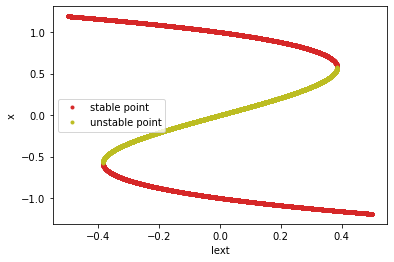

In [3]:
an = bp.analysis.Bifurcation(
    int_x,
    target_pars={'Iext': [-0.5, 0.5]},
    target_vars={"x": [-2, 2]},
    numerical_resolution=0.0001)

an.plot_bifurcation(show=True)

## Codimension2

Here we define the following 1D model for codimension 2 bifurcation testing.

$$\dot{x} = \mu+ \lambda x - x^3$$

In [4]:
@bp.odeint
def int_x(x, t, mu, lambda_):
    dxdt = mu + lambda_ * x - x ** 3
    return dxdt

plot bifurcation ...
SymPy solve "int_x(x, lambda_, mu) = 0" to "x = f(lambda_, mu)", failed because contain unknown symbols.
SymPy solve derivative of "int_x(x, lambda_, mu)" by "x", success.


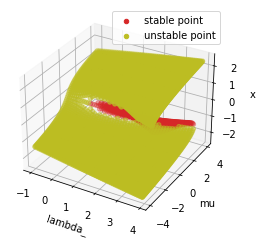

In [5]:
analyzer = bp.analysis.Bifurcation(
    int_x,
    target_pars={'mu': [-4, 4], 'lambda_': [-1, 4]},
    target_vars={'x': [-3, 3]},
    numerical_resolution=0.1)
analyzer.plot_bifurcation(show=True)